In [11]:
import sys
sys.path.append("../src")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from exact_solution import solve_master_equation, one_excited_emitter_state

In [12]:
# mirror swaps, 3 runs of 2000 shots
run1 = np.load('../data/QSCOUT/mirror_swaps/Experiment Probabilities.npy', allow_pickle=True) 
run2 = np.load('../data/QSCOUT/mirror_swaps/Experiment Probabilities (1).npy', allow_pickle=True)
run3 = np.load('../data/QSCOUT/mirror_swaps/Experiment Probabilities (1).npy', allow_pickle=True)

lines = []
for timestep in zip(run1, run2, run3):
    timestep_data = {key: _ for key in timestep[0].keys()}
    for key, _ in timestep_data.items():
        timestep_data[key] = (np.mean([timestep[0][key], timestep[1][key], timestep[2][key]]))
    lines.append(timestep_data)
    
qscout_results = pd.DataFrame(lines)

# renormalization on mirror swaps data
qscout_results[['1000', '0100', '0010', '0001']] = qscout_results[['1000', '0100', '0010', '0001']].divide(qscout_results[['1000', '0100', '0010', '0001']].sum(axis=1), axis=0)
qscout_results['avg_0100_0010'] = qscout_results[['0100', '0010']].mean(axis=1)

In [13]:
N = 3
g = 2
kappa = 5
times = np.linspace(0, 3, 51)

In [14]:
initial_state = one_excited_emitter_state(N, 1)
qutip_results = solve_master_equation(N, g, kappa, initial_state, times)

In [15]:
qscout_bitstrs = {
    "Emitter 1": "1000",
    "Emitter 2": "avg_0100_0010",
    "Cavity + Environment": "0001",
}

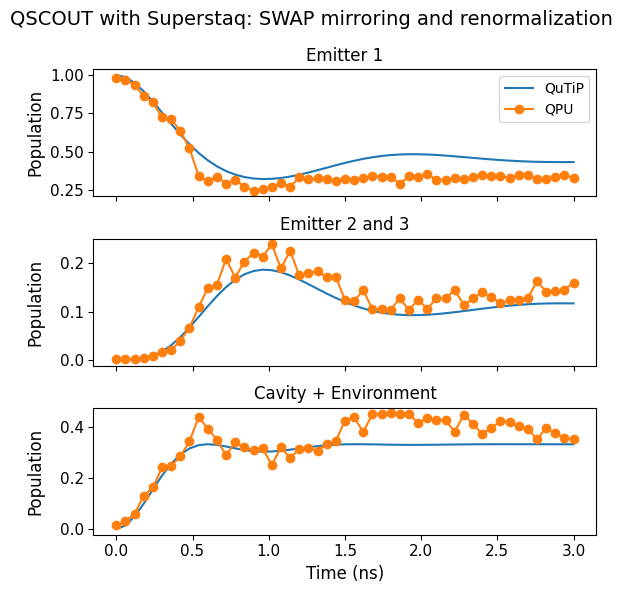

In [16]:
fig, axes = plt.subplots(3, figsize=(6, 6))

for a, column in zip(axes.flatten(), qscout_bitstrs.keys()):
    if column == "Emitter 2":
        a.set_title("Emitter 2 and 3", fontsize=12)
    else:
        a.set_title(column, fontsize=12)
    a.plot(qutip_results.index, qutip_results[column], label="QuTiP")

    qscout_normalized_avged = qscout_results
    qscout_column = qscout_bitstrs[column]
    a.plot(times, qscout_normalized_avged[qscout_column], marker='o', label="QPU")

    a.tick_params(axis='x', labelsize=11)
    a.tick_params(axis='y', labelsize=11)

axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[2].set_xlabel("Time (ns)", fontsize=12)

axes[0].set_ylabel("Population", fontsize=12)
axes[1].set_ylabel("Population", fontsize=12)
axes[2].set_ylabel("Population", fontsize=12)

fig.align_ylabels()

axes[0].legend(fontsize=10, loc="upper right")

fig.suptitle("QSCOUT with Superstaq: SWAP mirroring and renormalization", fontsize=14)
plt.tight_layout()

In [17]:
fig.savefig("../figures/QSCOUT_mirror_swaps_normalized_avged.eps")